In [1]:
import numpy as np
import csv
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

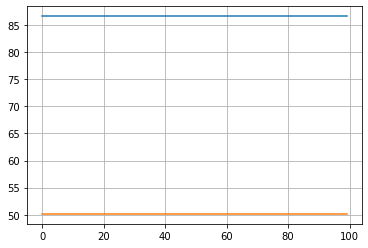

In [2]:
base = []
acc = []
for i in range(100):
    input = []
    test = []
    skip = True
    with open('mfcc_full.csv', newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in csvreader:
            if(skip):
                skip = False
                continue
            temp = []
            for col in row:
                temp = col.split(',')
            #if(random.randint(1,10)%7!=0):
                input.append(temp)
            #else:
                test.append(temp)
    random.shuffle(input)
    random.shuffle(test)
    Y = [i[0] for i in input]
    X = [(i[1:13]) for i in input]
    for x in X:
        for i in range(0,12):
            x[i] = float(x[i])
    test_Y = [i[0] for i in test]
    test_X = [(i[1:13]) for i in test]
    for t_x in test_X:
        for i in range(0,12):
            t_x[i] = float(t_x[i])

    X_np = np.array(X)
    Y_np = np.array(Y)
    test_X_np = np.array(test_X)
    test_Y_np = np.array(test_Y)

    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_np, Y_np)

    pred = clf.predict(test_X_np)
    #print("Prediction |   Actual   | Pred = Act?")
    #print("-------------------------------------")
    #for i in range(0,len(pred)):
        #print(pred[i], "      |",test_Y_np[i],"\t|", pred[i] == test_Y_np[i])
    correct = []
    for i in range(0,len(pred)):
        correct.append(pred[i]==test_Y[i])
        #print(test_Y[i],pred[i],pred[i]==test_Y[i],)
    accuracy = correct.count(True)/len(correct)
    uniq = set(test_Y)
    baseline = 0
    for u in uniq:
        if(test_Y.count(u)>baseline):
            baseline = test_Y.count(u)
    baseline /= len(correct)

    base.append(baseline*100)
    acc.append(accuracy*100)

    #print("-------------------------------------")
    #print("Baseline: ",baseline,"\nAccuracy: ",accuracy)
plt.plot(acc)
plt.plot(base)
plt.grid()

In [3]:
import statistics as stats
print("Mean Baseline : ",stats.mean(base))
print("Mean Accuracy : ",stats.mean(acc))

Mean Baseline :  50.15197568389058
Mean Accuracy :  86.62613981762918
